In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd
import matplotlib

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/' 
Ftm = '/Volumes/Dominic Time Machine/'

In [1]:
#PRAC SAVE ME [PLEASE M8888] 09090

## Avalanches


In [2]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*')) 
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy']

In [56]:
for i in range(len(blnlist)):
    size = np.load(blnlist[i])[0]
    dur = np.load(blnlist[i])[1]
    print(i)
    print('size = ' + str(np.max(size)))
    print('dur = ' + str((1/2.73)*np.max(dur)))

0
size = 4114
dur = 72.52747252747253
1
size = 4250
dur = 39.19413919413919
2
size = 767
dur = 16.84981684981685
3
size = 571
dur = 4.395604395604395
4
size = 180
dur = 9.890109890109889
5
size = 244
dur = 15.018315018315016
6
size = 30
dur = 4.029304029304029
7
size = 558
dur = 13.186813186813186
8
size = 67
dur = 5.86080586080586
9
size = 490
dur = 20.879120879120876


In [20]:
for i in range(len(blnlist)):
    size = np.load(blnlist[i])[0]
    dur = np.load(blnlist[i])[1]
    print(i)
    print('size = ' + str(np.max(size)))
    print('dur = ' + str(np.max(dur)))

0
size = 4114
dur = 198
1
size = 673843
dur = 2455
2
size = 4250
dur = 107
3
size = 767
dur = 46
4
size = 571
dur = 12
5
size = 180
dur = 27
6
size = 244
dur = 41
7
size = 30
dur = 11
8
size = 558
dur = 36
9
size = 67
dur = 16
10
size = 490
dur = 57


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

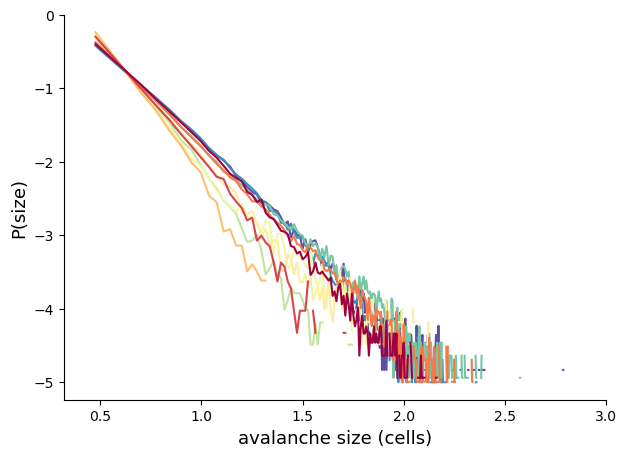

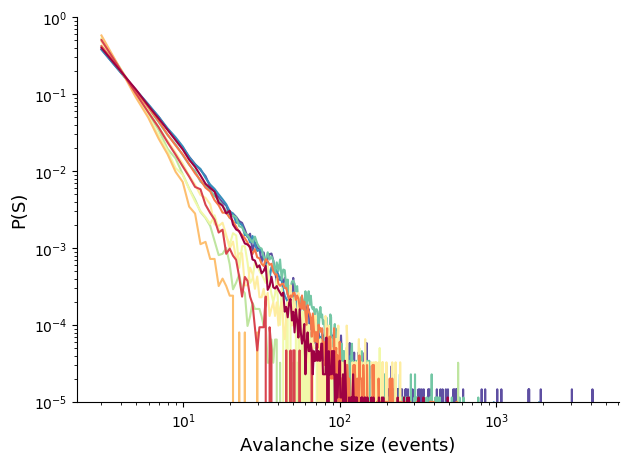

In [59]:
import matplotlib
from matplotlib import cm
binchoose = 4300

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']

colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[i])
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 3)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_xticklabels(labels)
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)

#plt.savefig(Ffig + 'av_size_axes.svg', transparent = True)
plt.show()


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

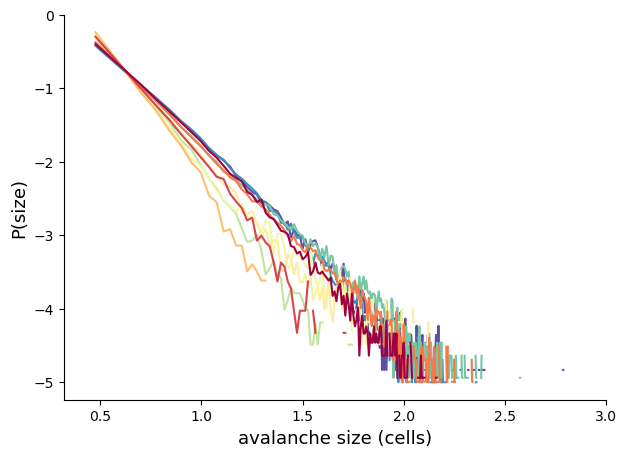

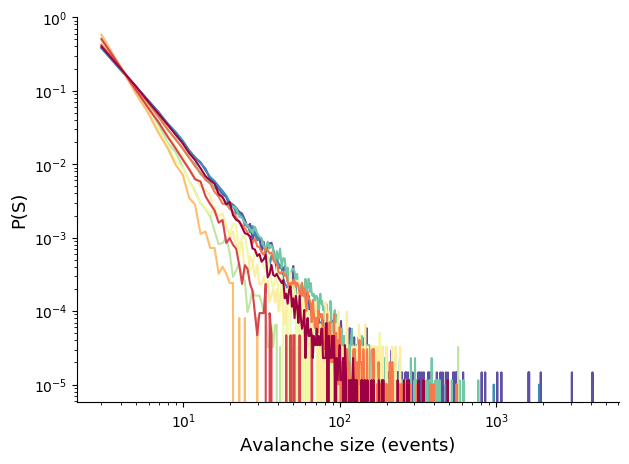

In [62]:
import matplotlib
from matplotlib import cm
binchoose = 4300

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']

colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[i])
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 3)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_xticklabels(labels)
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)

#plt.savefig(Ffig + 'av_size_axes.svg', transparent = True)
plt.show()


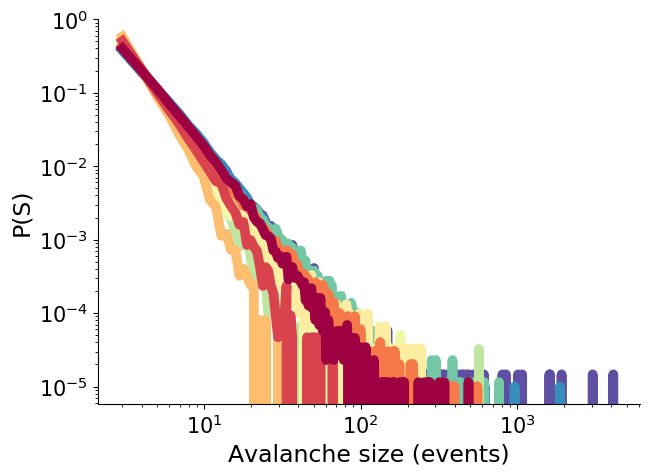

In [46]:
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 4300
labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

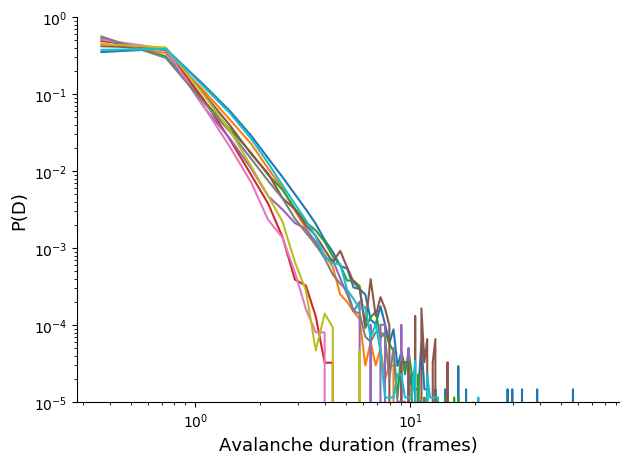

In [74]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

axarr.set_prop_cycle('color', colors)
sns.reset_orig()
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']

binchoose = 200
fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 100)  
plt.ylim(top = 1, bottom = 0.00001)  
axarr.set_ylabel('P(D)', size = '13')
axarr.set_xlabel('Avalanche duration (frames)', size = '13')
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'av_dur_axes.svg', transparent = True)

plt.show()

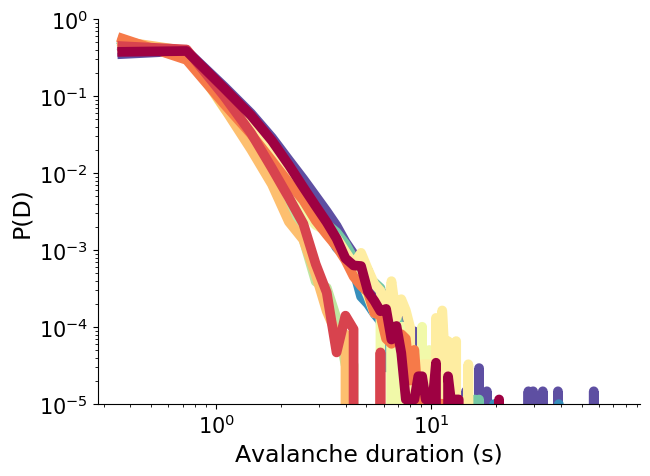

In [47]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

axarr.set_prop_cycle('color', colors)
sns.reset_orig()
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']

binchoose = 200
fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 100)  
plt.ylim(top = 1, bottom = 0.00001)  
axarr.set_ylabel('P(D)', size = '17')
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'av_dur.svg', transparent = True)

plt.show()

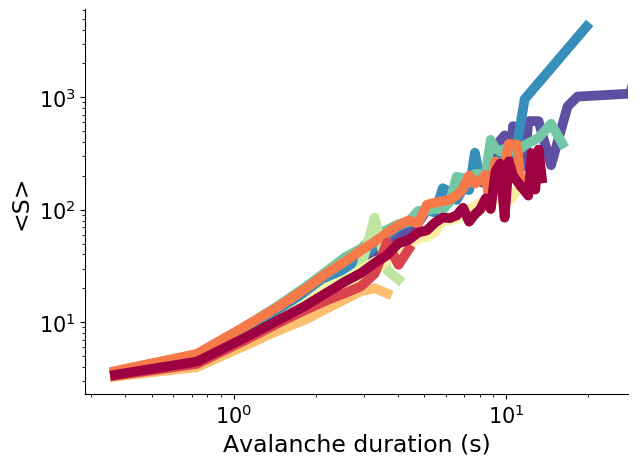

In [48]:
fig, axarr = plt.subplots(figsize = (7,5))
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']


sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

plt.xlim(right = 28)  
#plt.ylim(top = 10000)  

plt.savefig(Ffig + 'av_sizexdur.svg', transparent = True)
plt.show()

## DCC 


In [53]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
swap_dcc = sorted(glob.glob('*DCC*swap*')) 
bln_dcc,swap_dcc

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC.npy'],
 ['null_DCC-swap.npy'])

In [ ]:
for i in range(len(av_list)):
    curr_av = np.load(av_list)
    dcc = crfn.DCC(curr_av)

In [192]:
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy']

In [193]:
null_list = np.load(swap_dcc[0])
name_list = 'spatial'

dcc_comb = []
lab_comb = []
plot_comb, col_comb = [],[]

dcc_list = [bln_dcc]

for i in range(len(dcc_list)):
    for y in range(11):
        dcc_comb = np.append(dcc_comb, np.load(dcc_list[i][y] ,allow_pickle=True))
        lab_comb = np.append(lab_comb,'empirical')
        plot_comb = np.append(plot_comb, 1)
        col_comb = np.append(col_comb, y+1)
        
count=1
for i in range(len(null_list)):
    dcc_comb = np.append(dcc_comb, null_list[i])
    lab_comb = np.append(lab_comb,name_list)
    plot_comb = np.append(plot_comb, 1)
    col_comb = np.append(col_comb, 0)


null_df = pd.DataFrame({"dcc":dcc_comb , "Labels": lab_comb, 'Plot': plot_comb.astype(int), 'Col': col_comb.astype(int)})
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

col_list = list(range(len(colors ) + 1))
for i in range(len(colors)+1):
    if i == 0:
        col_list[i] = 'lightgrey'
    else:
        col_list[i] = colors[i-1]

In [189]:
null_df

,dcc,Labels,Plot,Col
0,0.207472,empirical,1,1
1,0.135406,empirical,1,2
2,0.201852,empirical,1,3
3,0.091520,empirical,1,4
4,0.142556,empirical,1,5
5,0.001309,empirical,1,6
6,0.113562,empirical,1,7
7,0.353099,empirical,1,8
8,0.016977,empirical,1,9
9,0.190581,empirical,1,10


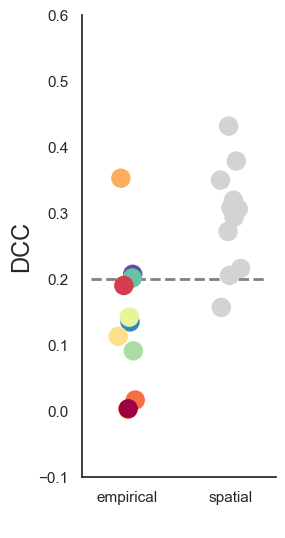

In [248]:
   
import matplotlib 
import seaborn as sns
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

sns.set(style="white")
fig, ax = plt.subplots(figsize = (2.5,6))
ax = sns.stripplot(x="Labels", y="dcc", data=null_df, hue = 'Col', palette = col_list, size = 14 , jitter = True)
#plt.hlines(np.mean(null_df['dcc'][null_df['Labels'] == 'empirical']), -0.2 ,0.2, linestyle = '-', color = 'black', linewidth = 4, zorder = 10)
plt.hlines(0.2, -0.35 ,1.35, linestyle = '--', color = 'grey', linewidth = 2, zorder = 1)
#plt.hlines(np.mean(np.load(swap_dcc[0])), 0.8 ,1.2, linestyle = '-', color = 'grey', linewidth = 4, zorder = 10)

ax.set_ylabel('DCC', size = '17')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
plt.ylim(bottom = -0.1, top = 0.6)  
ax.legend_.remove()
plt.savefig(Ffig + 'DCC_baseline.svg', transparent = True)
plt.show()

## LLR

In [79]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*')) 
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy']

In [92]:
size_llr, dur_llr = np.zeros(len(blnlist)), np.zeros(len(blnlist))
for i in range(len(blnlist)):
    curr = crfn.marglik_power_loglik(np.load(blnlist[i]), 2000) 
    size_llr[i] =  curr[0][1] - curr[2][2]
    dur_llr[i] = curr[1][1] - curr[3][2]
    print(i)

0
1
2
3
4
5
6
7
8
9


In [136]:
#LOGLIK RATIO
fli = list(range(10))
for i in range(10):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":size_llr ,"Fish": fli, "Labels": adfn.repeat_list('Size', 10)})

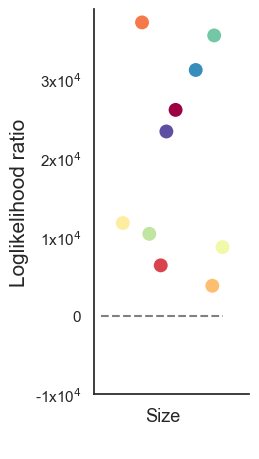

In [137]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Size'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.savefig(Ffig + 'llr_size.svg', transparent = True)
plt.show()

In [125]:
#LOGLIK RATIO
fli = list(range(10))
for i in range(10):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":dur_llr ,"Fish": fli, "Labels": adfn.repeat_list('Dur', 10)})

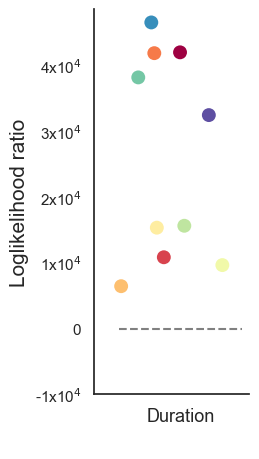

In [135]:
from matplotlib import cm

colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Duration'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.savefig(Ffig + 'llr_dur.svg', transparent = True)
plt.show()

# Branching ratio

In [138]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
bln_br = sorted(glob.glob('*BLN*_branch*'))
swap_br = sorted(glob.glob('*null*branch*space*')) 
bln_br,swap_br

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy'],
 ['null_branch-space.npy'])

In [147]:
col_comb

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [146]:
null_list = np.load(swap_br[0])[1]
name_list = 'spatial'

br_comb = []
lab_comb = []
plot_comb, col_comb = [],[]

br_list = [bln_br]

for i in range(len(br_list)):
    for y in range(10):
        br_comb = np.append(br_comb, np.load(br_list[i][y] ,allow_pickle=True))
        lab_comb = np.append(lab_comb,'empirical')
        plot_comb = np.append(plot_comb, 1)
        col_comb = np.append(col_comb, y+1)

count=1
for i in range(len(null_list)):
    br_comb = np.append(br_comb, null_list[i])
    lab_comb = np.append(lab_comb,name_list)
    plot_comb = np.append(plot_comb, 1)
    col_comb = np.append(col_comb, 0)

    

null_df = pd.DataFrame({"br":br_comb , "Labels": lab_comb, 'Plot': plot_comb.astype(int), 'Col': col_comb.astype(int)})
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
col_list = list(range(len(colors ) + 1))
for i in range(len(colors)+1):
    if i == 0:
        col_list[i] = 'lightgrey'
    else:
        col_list[i] = colors[i-1]

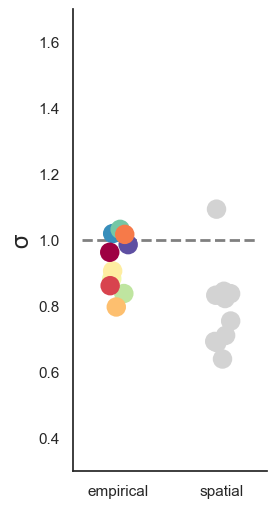

In [145]:
size_list = []
for i in range(len(null_df['br'])):
    if i < 11:
        size_list = np.append(size_list, 8)
    else:
        size_list = np.append(size_list, 11)

import matplotlib 
import seaborn as sns
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

sns.set(style="white")
fig, ax = plt.subplots(figsize = (2.5,6))
ax = sns.stripplot(x="Labels", y="br", data=null_df, hue = 'Col', palette = col_list, size = 14 , jitter = True)
#plt.hlines(np.mean(null_df['dcc'][null_df['Labels'] == 'empirical']), -0.2 ,0.2, linestyle = '-', color = 'black', linewidth = 4, zorder = 10)
plt.hlines(1, -0.35 ,1.35, linestyle = '--', color = 'grey', linewidth = 2, zorder = 1)
#plt.hlines(np.mean(np.load(swap_dcc[0])), 0.8 ,1.2, linestyle = '-', color = 'grey', linewidth = 4, zorder = 10)

ax.set_ylabel('σ', size = '17')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
plt.ylim(bottom = 0.3, top = 1.7)  
ax.legend_.remove()
plt.savefig(Ffig + 'BR_baseline.svg', transparent = True)
plt.show()

# Connectivity-distance
* np.corrcoeff function for entire matrix 
* bin data on linear scale 
* ignore negative correlations
* exponent match theory

In [19]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*BLN*cut*realtrace*')) 
coordlist = sorted(glob.glob('*BLN*realcoord*')) 
distlist = sorted(glob.glob('*BLN*dist.npy*')) 
binlist = sorted(glob.glob('*BLN*_corrdist_bins.*'))
tracelist, binlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE

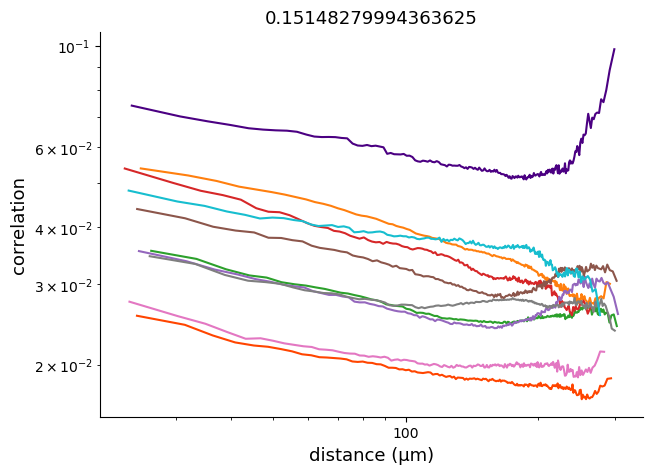

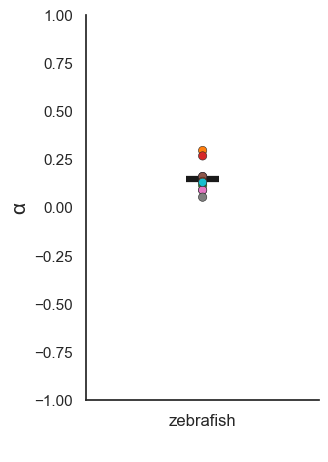

In [20]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = np.load(binlist[i])[0]
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.set_title(str(np.mean(slope)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(10))      
for i in range(10):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',10)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(-1,1)
plt.show()

In [21]:
from scipy import stats
data = slopedf['α']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.15148279994363625 0.024435048075341505


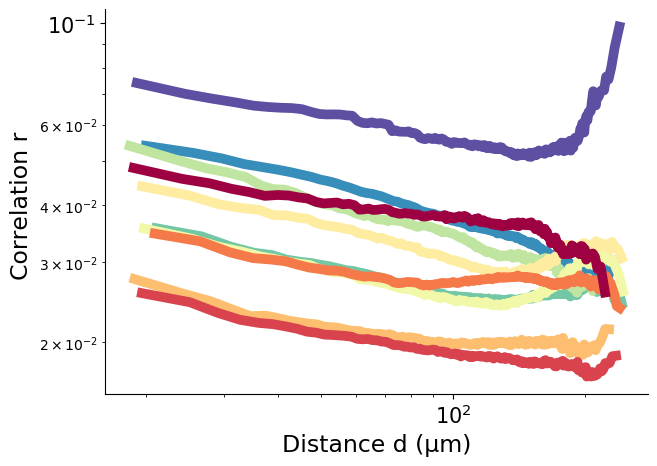

In [49]:
import matplotlib
from matplotlib import cm

colors  = cm.Spectral_r(np.linspace(0,1,len(binlist)))
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = (np.load(binlist[i])[0]*0.8)
    #curr = np.load(binlist[i])[1][:150]
    #yaxis = curr / np.mean(curr)
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
    #m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:150]), np.log10(yaxis[:len(xaxis)-1][1:150]), 1)
    #y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    #plt.plot(xaxis[:len(xaxis)-1][1:], y_fit[:len(xaxis)-1][1:], linestyle = '--', linewidth = 2, c = colors[i], alpha = 1)

axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.set_xlim(right = 220)
axarr.set_xlabel('Distance d (μm)', size = '17')
#axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('Correlation r ', size = '17')
plt.xticks(size = 15)
plt.yticks(size = 15)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'fcd.svg', transparent = True)
plt.show()

# Eigenspectrum
* Baseline PCA variance plots - exponent calculation
* behaviour PCA variance

In [3]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
blnpcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy']

In [ ]:
#Calculate entire trace PC-variance
#blnpcv, p20pcv = list(range(len(blnraw))),list(range(len(p20raw)))
#for e in range(len(blnraw)):
#    b_data, p_data = np.load(blnraw[e]), np.load(p20raw[e])
#    n_components = b_data.shape[1]
#    b_pca, p_pca = decomposition.PCA(n_components) ,decomposition.PCA(n_components) #Define decomposition
#    b_fit, p_fit = b_pca.fit(b_data) ,p_pca.fit(p_data) 
#    blnpcv[e], p20pcv[e] = b_fit.explained_variance_ratio_, p_fit.explained_variance_ratio_
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, blnraw) + '_' + 'pcavar.npy', blnpcv[e])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p20raw)  + '_' + 'pcavar.npy', p20pcv[e])
#    print('Saved fish #' + str(e))

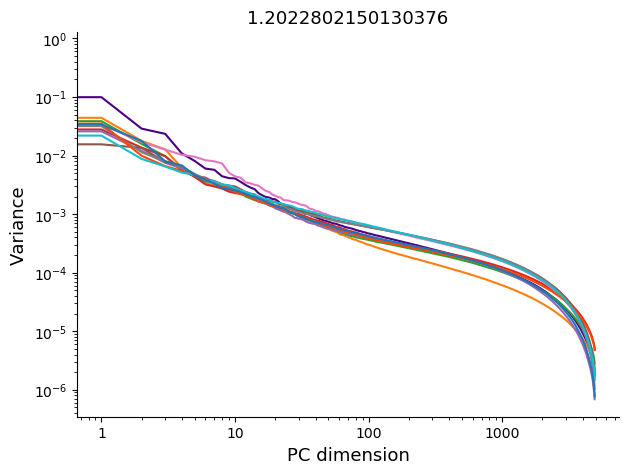

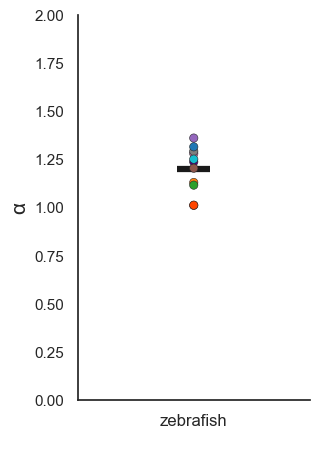

In [418]:
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(slope)), size = '13')
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(0,2)
plt.show()


In [419]:
from scipy import stats
data = slopedf['α']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.2022802150130376 0.03579071540005405


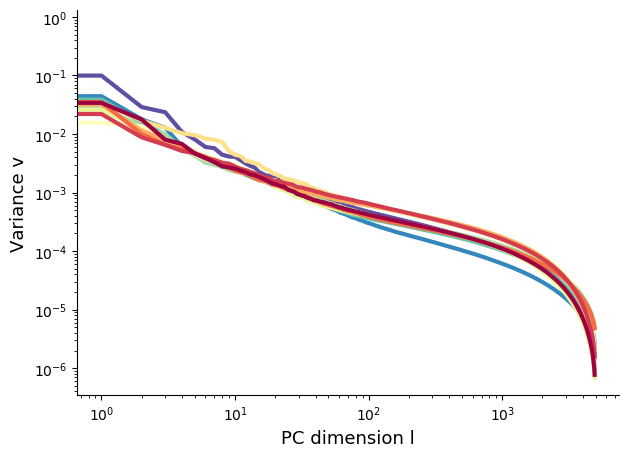

In [23]:
from matplotlib import cm
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']

sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance v', size = '13')
axarr.set_xlabel('PC dimension l', size = '13')

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
plt.savefig(Ffig + 'eigspec.svg', transparent = True)
plt.show()


In [22]:
10**0

1